<a href="https://colab.research.google.com/github/AlawiAhmed/Spam-Email/blob/main/Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-5d5a5f0ff9d6>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Category'], palette='pastel')


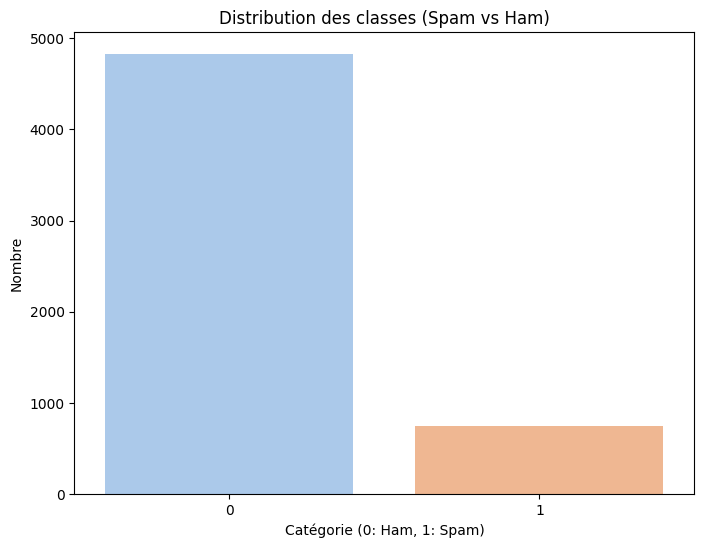

Régression Logistique :
Accuracy: 0.98
Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       955
           1       0.97      0.89      0.93       160

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


k-Nearest Neighbors :
Accuracy: 0.93
Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       955
           1       0.99      0.55      0.71       160

    accuracy                           0.93      1115
   macro avg       0.96      0.77      0.83      1115
weighted avg       0.94      0.93      0.93      1115



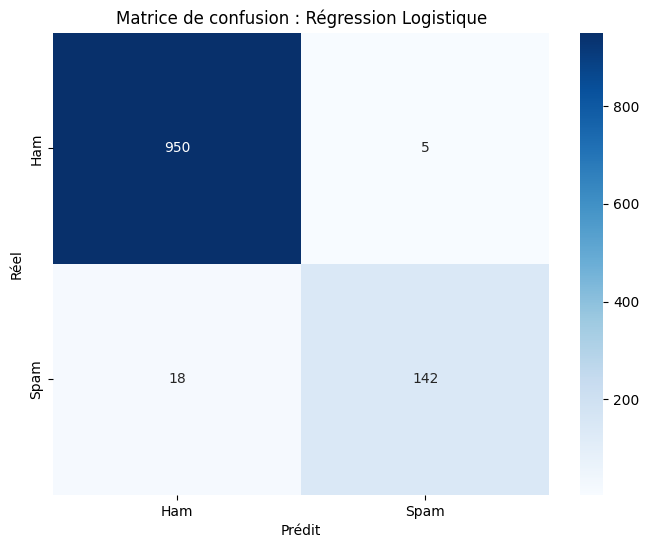

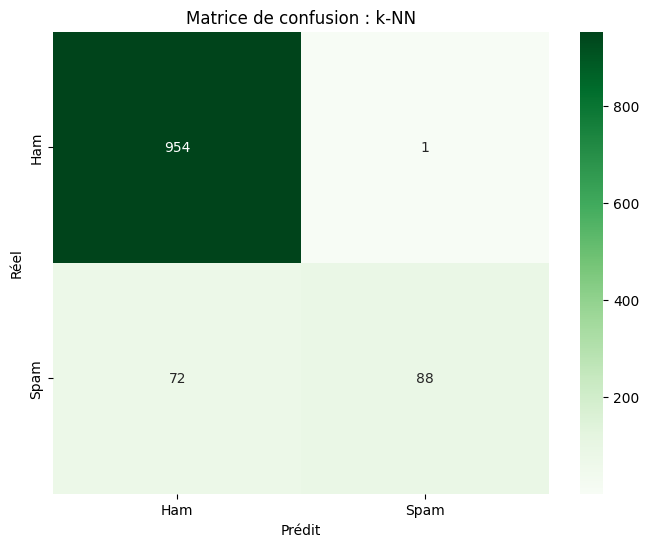

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données
file_path = '/spam.csv'  # Chemin vers le fichier
data = pd.read_csv(file_path, encoding="latin-1")

# Nettoyage des colonnes inutiles (adapter si nécessaire)
data.columns = ['Category', 'Message']
data = data[['Category', 'Message']]  # Conserver uniquement les colonnes pertinentes
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})  # Convertir les labels

# Supprimer les lignes avec des messages manquants
data = data.dropna(subset=['Message'])

# Visualisation de la distribution des classes
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Category'], palette='pastel')
plt.title("Distribution des classes (Spam vs Ham)")
plt.xlabel("Catégorie (0: Ham, 1: Spam)")
plt.ylabel("Nombre")
plt.show()

# Diviser les caractéristiques (X) et la cible (y)
X = data['Message']  # Caractéristiques (les messages)
y = data['Category']  # Cible (labels)

# Transformer les textes en vecteurs numériques avec CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Diviser le jeu de données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle avec la Régression Logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Prédictions avec l'ensemble de test
logistic_predictions = logistic_model.predict(X_test)

# Entraînement du modèle avec k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Prédictions avec l'ensemble de test
knn_predictions = knn_model.predict(X_test)

# Évaluation des modèles
print("Régression Logistique :")
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, logistic_predictions))

print("\nk-Nearest Neighbors :")
print(f"Accuracy: {accuracy_score(y_test, knn_predictions):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, knn_predictions))

# Matrices de confusion
logistic_cm = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Matrice de confusion : Régression Logistique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

knn_cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Matrice de confusion : k-NN")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Interface utilisateur simple pour tester manuellement des emails
# while True:
#     print("\nTestez manuellement un email (entrez 'exit' pour quitter) :")
#     user_input = input("Entrez un email : ")
#     if user_input.lower() == 'exit':
#         break
#     user_input_vectorized = vectorizer.transform([user_input])
#     logistic_result = logistic_model.predict(user_input_vectorized)[0]
#     knn_result = knn_model.predict(user_input_vectorized)[0]
#     print(f"Prédiction Logistic Regression : {'Spam' if logistic_result == 1 else 'Ham'}")
#     print(f"Prédiction k-NN : {'Spam' if knn_result == 1 else 'Ham'}")
